In [12]:
from data import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv('data/df_distance.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,haversine_distance
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,0.163832
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2.145919
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175


In [54]:
data['haversine_distance'].max()

14.292878842684486

### Distribution shooting

In [119]:
data_log = data.copy()
data_log.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,haversine_distance
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,0.163832
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2.145919
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175


In [222]:
data_shoot = pd.DataFrame(data_log[data_log['SHOOTING'] ==1].groupby('NAME').size())
data_shoot.reset_index(inplace=True)
data_shoot[0]


0      24
1       5
2     239
3      19
4      23
5      40
6      86
7     297
8     487
9      47
10     68
11     20
Name: 0, dtype: int64

In [92]:
count = pd.DataFrame(data_log.groupby('NAME').INCIDENT_NUMBER.count().reset_index())
count

,NAME,INCIDENT_NUMBER
0,Brighton,13784
1,Charlestown,4733
2,Dorchester,32868
3,Downtown,26243
4,East Boston,9686
5,Hyde Park,12550
6,Jamaica Plain,12800
7,Mattapan,28329
8,Roxbury,38870
9,South Boston,16558


In [140]:
cat = pd.DataFrame(data_log.groupby(['NAME','OFFENSE_CODE_GROUP']).INCIDENT_NUMBER.count())
cat = cat.reset_index()
cat.rename(columns = {'OFFENSE_CODE_GROUP':"Catégorie d'incidents"}, inplace = True)
cat

,NAME,Catégorie d'incidents,INCIDENT_NUMBER
0,Brighton,Disputes,563
1,Brighton,Drugs and disorderly conduct,809
2,Brighton,Fraud and law violations,1806
3,Brighton,Larceny and vandalism,5272
4,Brighton,Other,925
...,...,...,...
79,West Roxbury,Fraud and law violations,1168
80,West Roxbury,Larceny and vandalism,2908
81,West Roxbury,Other,879
82,West Roxbury,Police investigation procedure,2034


Text(0, 0.5, "Nombre d'incidents")

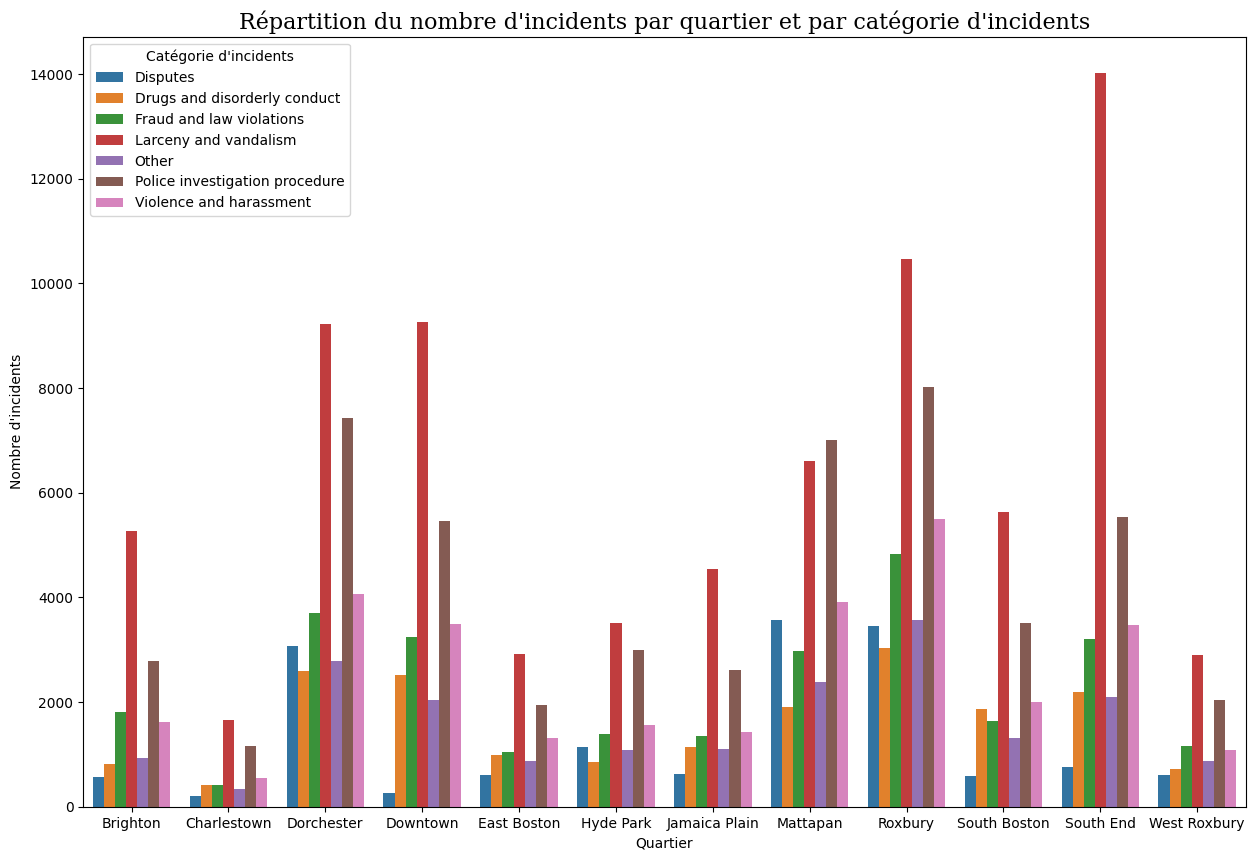

In [208]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plt.figure(figsize=(15,10))
sns.barplot(data=cat, x='NAME', y='INCIDENT_NUMBER', hue="Catégorie d'incidents");
plt.title("Répartition du nombre d'incidents par quartier et par catégorie d'incidents", fontdict=font)
plt.xlabel('Quartier')
plt.ylabel("Nombre d'incidents")

Text(0, 0.5, "Nombre d'incidents")

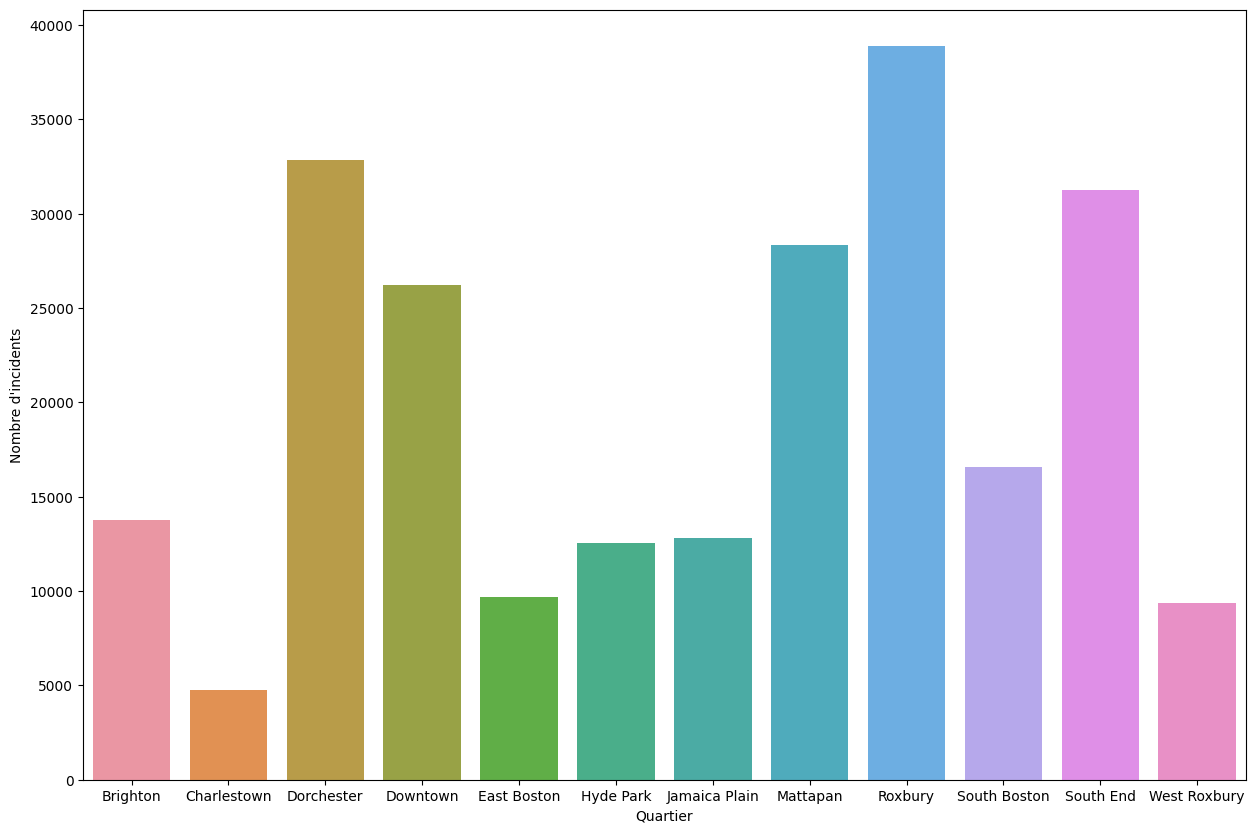

In [91]:
plt.figure(figsize=(15,10))
sns.barplot(data=count, x='NAME', y='INCIDENT_NUMBER');
plt.xlabel('Quartier')
plt.ylabel("Nombre d'incidents")

In [224]:
shoot_table = pd.DataFrame(data_log.groupby('NAME').SHOOTING.sum())
shoot_table.reset_index(inplace=True)

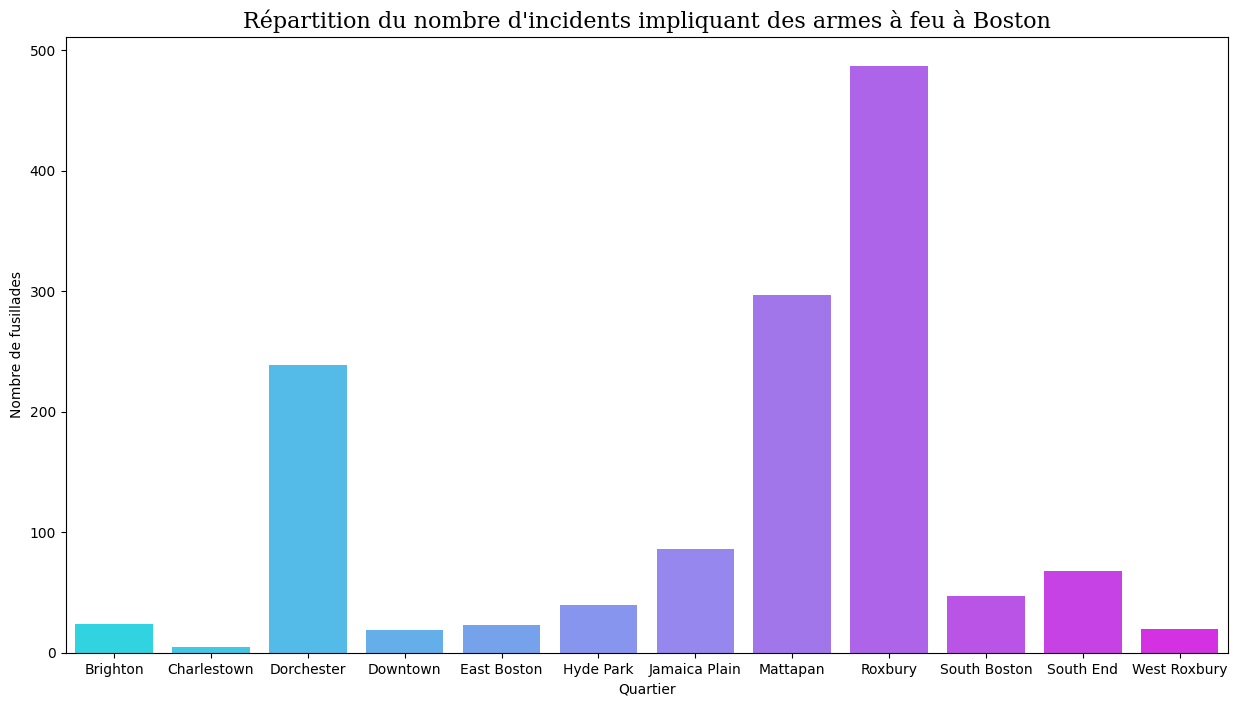

In [237]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plt.figure(figsize=(15,8))
sns.barplot(data=shoot_table, x='NAME', y='SHOOTING', palette='cool')
plt.title("Répartition du nombre d'incidents impliquant des armes à feu à Boston",fontdict=font)
plt.ylabel('Nombre de fusillades')
plt.xlabel('Quartier');


In [41]:
mean_dist = pd.DataFrame(data_log.groupby('NAME').haversine_distance.mean())
mean_dist

,haversine_distance
NAME,
Brighton,3.770867
Charlestown,58.758394
Dorchester,3.174444
Downtown,6.336657
East Boston,5.568626
Hyde Park,2.397613
Jamaica Plain,2.585737
Mattapan,1.908636
Roxbury,2.989029


In [48]:
df = shoot_table.merge(mean_dist, on='NAME',how='right')

In [49]:
df

,SHOOTING,haversine_distance
NAME,,
Brighton,13764,3.770867
Brighton,24,3.770867
Charlestown,4760,58.758394
Charlestown,5,58.758394
Dorchester,32636,3.174444
Dorchester,239,3.174444
Downtown,26241,6.336657
Downtown,19,6.336657
East Boston,9668,5.568626


In [196]:
DF = data.copy()
DF

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,haversine_distance
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,0.163832
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2.145919
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
...,...,...,...,...,...,...,...,...,...,...
237060,I172049757,Police investigation procedure,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300,0.732215
237061,I172049757,Drugs and disorderly conduct,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300,0.732215
237062,I172027369,Other,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300,1.815839
237063,I172027369,Police investigation procedure,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300,1.815839


In [197]:
DF['OCCURRED_ON_DATE'] = pd.to_datetime(DF['OCCURRED_ON_DATE'])
DF

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,haversine_distance
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,0.163832
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2.145919
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
...,...,...,...,...,...,...,...,...,...,...
237060,I172049757,Police investigation procedure,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300,0.732215
237061,I172049757,Drugs and disorderly conduct,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300,0.732215
237062,I172027369,Other,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300,1.815839
237063,I172027369,Police investigation procedure,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300,1.815839


In [198]:
df_annuel = DF.resample('Y', on='OCCURRED_ON_DATE').sum()
evo_shoot_perM = pd.DataFrame(df_annuel['SHOOTING'])
evo_shoot_perM.reset_index(inplace=True)

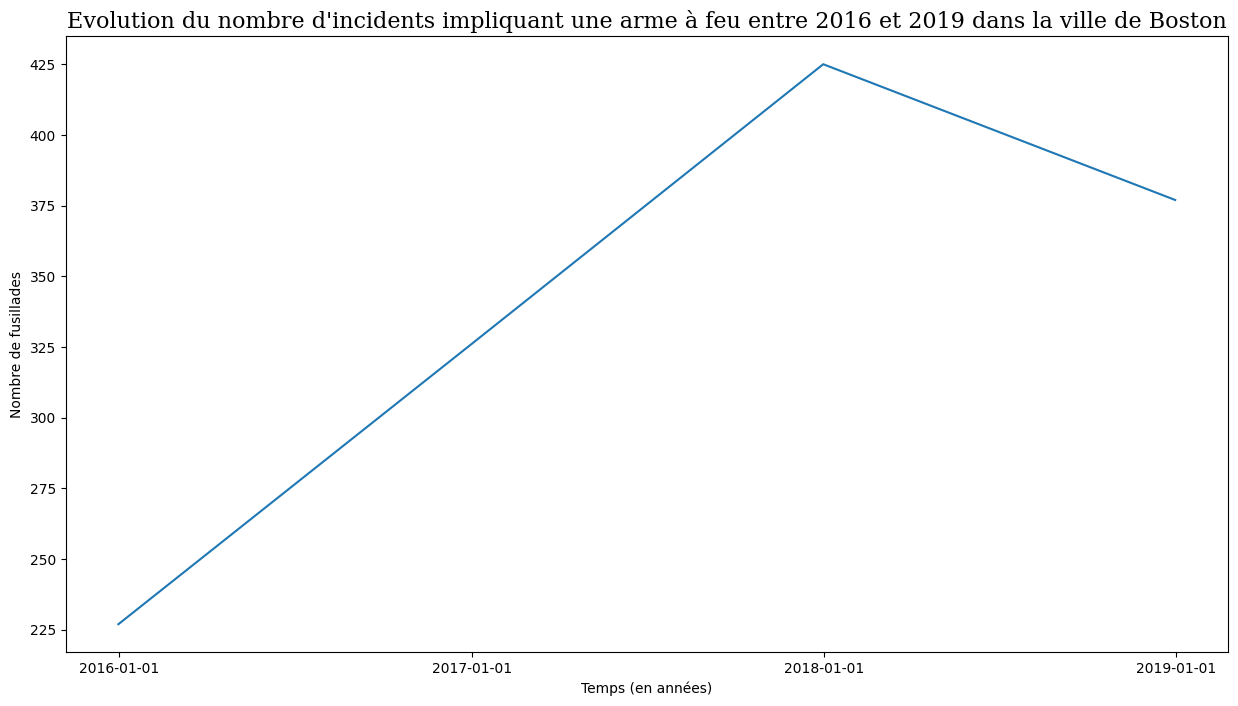

In [207]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plt.figure(figsize=(15,8))
sns.lineplot(data=evo_shoot_perM, x='OCCURRED_ON_DATE', y='SHOOTING')
plt.title("Evolution du nombre d'incidents impliquant une arme à feu entre 2016 et 2019 dans la ville de Boston",fontdict=font)
plt.ylabel('Nombre de fusillades')
plt.xlabel('Temps (en années)');
plt.xticks(['2016','2017','2018','2019']);